In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import os
import tools

In [2]:
data = pd.read_csv('data.csv')

In [3]:
stats = pd.read_csv('stats.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'filename', 'name', 'hand', 'board', 'pf stack(bb)',
       '#pl pf', 'position pf', 'position pf/#pl pf', 'pf bets(bb)', 'pf agg',
       'stack/pfpot', 'hand strength pf', 'fl stack(bb)', '#pl fl',
       'position fl', 'position fl/#pl fl', 'fl bets(bb)', 'fl bets/pot',
       'fl agg', 'stack/flpot', 'hand strength fl', 'bluff flop',
       'tr stack(bb)', '#pl tr', 'position tr', 'position tr/#pl tr',
       'tr bets(bb)', 'tr bets/pot', 'tr agg', 'stack/trpot',
       'hand strength tr', 'bluff turn', 'rv stack(bb)', '#pl rv',
       'position rv', 'position rv/#pl rv', 'rv bets(bb)', 'rv bets/pot',
       'rv agg', 'stack/rvpot', 'hand strength rv', 'bluff river', 'tot bets',
       'tot agg', 'bets/stacks', 'street reached', 'cluster'],
      dtype='object')

In [5]:
stats.columns

Index(['Unnamed: 0', 'avgstack', 'net', 'foldpf', 'callpf', 'raisepf',
       'foldtoraisepf', 'numraisedpf', 'reraisepf', 'foldtoreraisepf',
       'numreraisedpf', 'numplayedpf', 'pctseenfl', 'foldfl', 'callfl',
       'betfl', 'raisefl', 'foldtoraisefl', 'numraisedfl', 'reraisefl',
       'foldtoreraisefl', 'numreraisedfl', 'numplayedfl', 'pctseentr',
       'foldtr', 'calltr', 'bettr', 'raisetr', 'foldtoraisetr', 'numraisedtr',
       'reraisetr', 'foldtoreraisetr', 'numreraisedtr', 'numplayedtr',
       'pctseenrv', 'foldrv', 'callrv', 'betrv', 'raiserv', 'foldtoraiserv',
       'numraisedrv', 'reraiserv', 'foldtoreraiserv', 'numreraisedrv',
       'numplayedrv', 'pctseensd', 'numplayedsd', 'winpercent', 'bb/100hands'],
      dtype='object')

In [6]:
tools.startinghandsequity(['As','Ad'], ['Ks','Kh'])

0.81714695692062378

object
         Unnamed: 0  filename   name   hand  board  pf stack(bb)  #pl pf  \
cluster                                                                    
0             27483     27483  27483  27483  27412         27483   27483   
1             14630     14630  14630  14630  14539         14630   14630   
2             82886     82886  82886  82886  82852         82886   82886   
3              7821      7821   7821   7821   7779          7821    7821   

         position pf  position pf/#pl pf  pf bets(bb)       ...        \
cluster                                                     ...         
0              27483               27483        27483       ...         
1              14630               14630        14630       ...         
2              82886               82886        82886       ...         
3               7821                7821         7821       ...         

         rv bets(bb)  rv bets/pot  rv agg  stack/rvpot  hand strength rv  \
cluster              

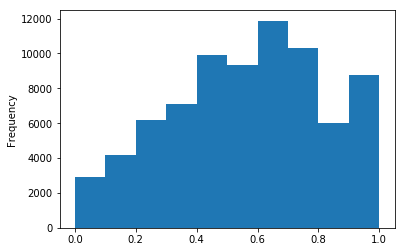

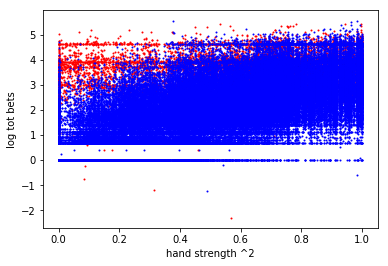

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline
df = pd.read_csv('data.csv')

#print(df['name'].value_counts())
print(df['board'].dtypes)
print(df.groupby('cluster').count())
#df = df[df['cluster'] == 3]
print(df.head())
print('shape', df.shape)
#df['board texture'] = df['board'].apply(hr.boardtexture)
df['hand strength ^2'] = df['hand strength rv'] ** 2
df['tot bets/stack'] = df['tot bets']/df['pf stack(bb)']
df['log tot bets'] = np.log(df['tot bets'])
df['log tot bets/stack'] = np.log(df['tot bets/stack'])
df['log tot agg'] = np.sqrt(df['tot agg'])
#df['pf agg'] = np.sqrt(df['pf agg'])
#df['rv agg'] = np.sqrt(df['rv agg'])
#df['tr agg'] = np.sqrt(df['tr agg'])
#df['fl agg'] = np.sqrt(df['fl agg'])
#df['rv bets(bb)'] = np.sqrt(df['rv bets(bb)'])
#df['tr bets(bb)'] = np.sqrt(df['tr bets(bb)'])
#df['fl bets(bb)'] = np.sqrt(df['fl bets(bb)'])
#df['pf bets(bb)'] = np.sqrt(df['pf bets(bb)'])
#df['rv bets/pot'] = np.sqrt(df['rv bets/pot'])
#df['tr bets/pot'] = np.sqrt(df['tr bets/pot'])
#df['fl bets/pot'] = np.sqrt(df['fl bets/pot'])

#print(df[df['hand strength ^2'] == 0])
print(df.columns)
df2 = df
df2 = df2[df2['street reached'] == 2]
df = df.dropna(axis = 0)
df = df[df['bluff river'] == 0]
df = df[df['bluff turn'] == 0]
#df = df[df['bluff flop'] == 0]
df = df[df['street reached'] == 3]
#df = df[df['pf stack(bb)'] > 80]
#df = df[df['straight draws flop'] == 0]
#df = df[df['flush draws flop'] == 0]
#df = df[df['straight draws turn'] == 0]
#df = df[df['flush draws turn'] == 0]
#print(df['bluff river'].value_counts())
print(df.corr()['hand strength ^2'].sort_values())
print(df[df['hand strength rv'].isnull()]['hand strength rv'])
df['hand strength ^2'].plot.hist()
#df['log tot bets'].plot.hist()
ax = df2.plot.scatter(x = 'hand strength ^2', y = 'log tot bets', s = 1, color = 'red')
df.plot.scatter(x = 'hand strength ^2', y = 'log tot bets', s = 1, color = 'blue', ax = ax)

X = df.drop(['filename','Unnamed: 0','street reached','name',
       'hand','board','hand strength fl','hand strength tr','hand strength rv',
       'hand strength ^2','bluff flop','bluff turn',
       'bluff river'], axis = 1)
#X = df[['log tot bets','log tot bets/stack','log tot agg',
#       'tot bets/stack','tot bets','rv bets(bb)','rv bets/pot',
#       'fl bets(bb)','fl bets/pot','tot agg','tr bets(bb)',
#       'tr bets/pot']]
y = df['hand strength ^2']
#print(X.columns)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X,y)
ss = StandardScaler()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
pipe = Pipeline([
    ('ss', ss),
    ('gbr', gbr)
])
params = {
        
}
gs = GridSearchCV(pipe, param_grid = params)
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)
print(gs.score(X_test, y_test))

z = pd.DataFrame(gs.predict(X_test))
z['test actual'] = list(y_test)

z[0] = np.sqrt(z[0])
z['test actual'] = np.sqrt(z['test actual'])
z['diff'] = z[0] - z['test actual']
print("median:", np.median(np.abs(z['diff'])))
print("std:", np.std(z['diff']))

In [90]:
pd.set_option('display.max_columns', None)
print(df.head())

    Unnamed: 0                                           filename  \
0            0  data/(PRR) Kajsa (short) - 10-0.50-1-USD-NoLim...   
3            3  data/(PRR) Kajsa (short) - 10-0.50-1-USD-NoLim...   
4            4  data/(PRR) Kajsa (short) - 10-0.50-1-USD-NoLim...   
11          11  data/(PRR) Kajsa (short) - 10-0.50-1-USD-NoLim...   
12          12  data/(PRR) Kajsa (short) - 10-0.50-1-USD-NoLim...   

              name          hand                           board  \
0      Play0rLeave  ['2c', '8h']  ['8s', 'Tc', 'Ks', '9c', '3h']   
3       jabster579  ['8h', 'Td']  ['5s', '8c', 'Qh', '7h', '5d']   
4          Parcker  ['9h', '9c']  ['5s', '8c', 'Qh', '7h', '5d']   
11        Mi1house  ['9s', '9h']  ['Jd', '7c', 'Js', 'Kh', '8s']   
12  basic instinct  ['Jd', 'Ac']  ['Jh', '7c', '9d', 'Jc', '4c']   

    pf stack(bb)  #pl pf  position pf  position pf/#pl pf  pf bets(bb)  \
0          50.00       5            3                0.75          1.0   
3          24.30       6    

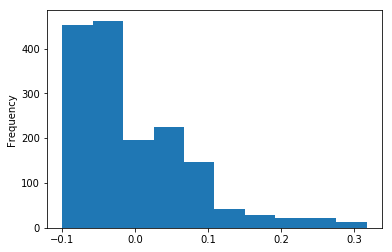

In [96]:
z[(z[0]<=1) & (z[0]>.90)]['diff'].plot.hist()
#z['diff'].plot.hist()

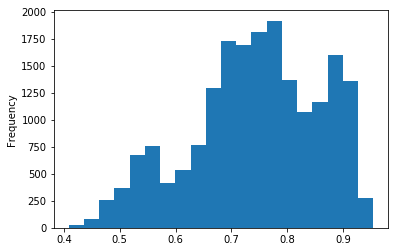

In [92]:
z[0].plot.hist(bins = 20)

In [93]:
print(max(z[0]))

0.954170980496


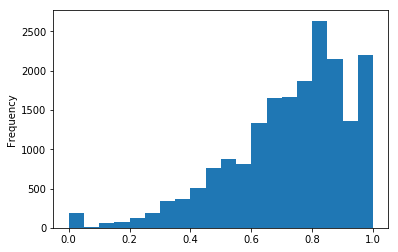

In [94]:
z['test actual'].plot.hist(bins = 20)

/Users/Vince/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/Vince/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


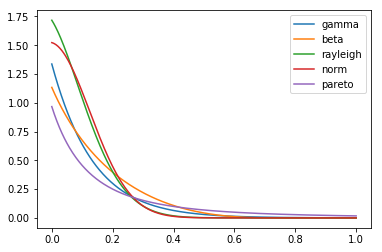

In [11]:
X = z[(z[0]<=1) & (z[0]>.85)]['diff']


dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(X)
    pdf_fitted = dist.pdf(np.linspace(0,1,len(X)), *param[:-2], loc=param[-2], scale=param[-1]) * max(X) 

    plt.plot(np.linspace(0,1,len(X)), pdf_fitted, label=dist_name)

#param = rayleigh.fit(z['test actual'])
plt.legend(loc='upper right')
plt.show()



In [12]:
print(np.linspace(0,1,len(z['test actual'])))

[  0.00000000e+00   5.22138680e-05   1.04427736e-04 ...,   9.99895572e-01
   9.99947786e-01   1.00000000e+00]


In [13]:
print(pdf_fitted)

[ 0.96673721  0.94963675  0.93293968  0.91663414  0.90070868  0.88515223
  0.86995415  0.85510413  0.84059223  0.82640885  0.8125447   0.79899083
  0.78573857  0.77277955  0.76010568  0.74770912  0.7355823   0.72371791
  0.71210885  0.70074828  0.68962954  0.67874622  0.6680921   0.65766115
  0.64744754  0.63744562  0.62764991  0.61805511  0.60865607  0.59944781
  0.59042549  0.58158443  0.57292009  0.56442804  0.55610402  0.54794388
  0.53994358  0.53209922  0.52440701  0.51686325  0.50946438  0.50220692
  0.49508749  0.48810282  0.48124971  0.47452509  0.46792593  0.46144932
  0.45509241  0.44885244  0.44272673  0.43671266  0.43080769  0.42500935
  0.41931524  0.41372301  0.40823039  0.40283516  0.39753516  0.3923283
  0.38721253  0.38218587  0.37724636  0.37239213  0.36762133  0.36293218
  0.35832292  0.35379187  0.34933735  0.34495776  0.34065152  0.3364171
  0.33225299  0.32815775  0.32412994  0.32016819  0.31627113  0.31243745
  0.30866586  0.3049551   0.30130395  0.29771121  0.2

(369.15614484932894, -4.3352518506175155, 0.013273492218148476)


TypeError: _parse_args() missing 1 required positional argument: 'a'

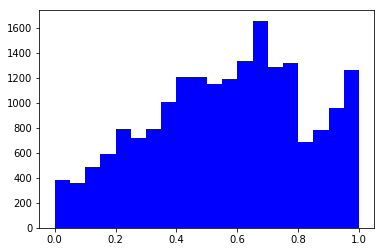

In [14]:
X = z['test actual']

h = plt.hist(X, bins = 20,color='blue')
dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

param = scipy.stats.gamma.fit(X)
print(param)
pdf_fitted = scipy.stats.gamma.pdf(np.linspace(0,1,len(X)), loc=param[-2], scale=param[-1]) * 1000
plt.plot(np.linspace(0,1,len(X)),pdf_fitted, label=dist_name)

ValueError: x and y must have same first dimension, but have shapes (19153,) and (481,)

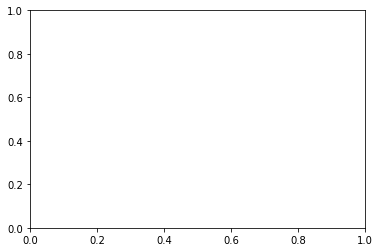

In [23]:
plt.plot(np.linspace(0,1,len(z['test actual'])),pdf_fitted, label=dist_name)

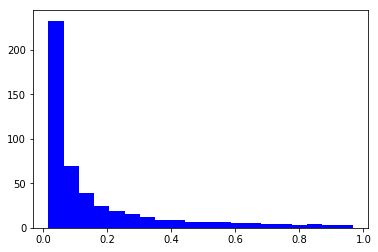

In [24]:
h = plt.hist(pdf_fitted, bins = 20,color='blue')

In [25]:
from scipy.stats import gamma

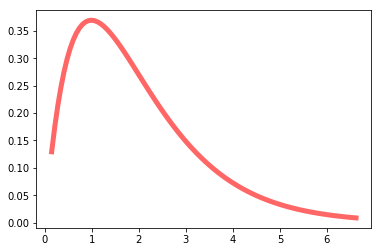

In [26]:
fig, ax = plt.subplots(1,1)
a = 1.99
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
x = np.linspace(gamma.ppf(0.01, a), gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),'r-', lw=5, alpha=0.6)

In [27]:
rv = gamma(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = gamma.ppf([0.001, 0.5, 0.999], a)
np.allclose([0.001, 0.5, 0.999], gamma.cdf(vals, a))

r = gamma.rvs(a, size=1000)

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.5)
ax.legend(loc='best', frameon=False)
plt.show()

In [106]:
pred = .8

X = z[(z[0]<=pred + .05) & (z[0]>pred - .05)]['diff']

fit_alpha, fit_loc, fit_beta=gamma.fit(X)
print(fit_alpha, fit_loc, fit_beta)
# (5.0833692504230008, 100.08697963283467, 21.739518937816108)

#print(alpha, loc, beta)

4.62763246392 -0.273231469805 0.0603981484227


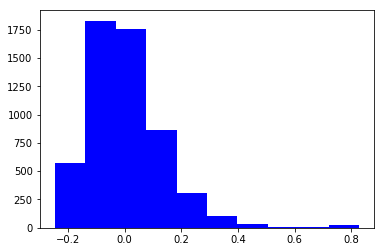

In [107]:
d = gamma.rvs(fit_alpha, loc=fit_loc, scale=fit_beta, size=700)

h = plt.hist(X, bins = 10,color='blue')

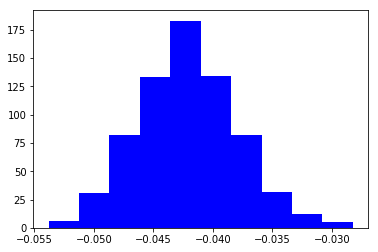

In [105]:
h = plt.hist(d, bins = 10,color='blue')

(array([  5122.,   4942.,   6495.,   8823.,  10943.,  11593.,   6472.,
          7951.,   4511.,      0.,   1489.,   1511.,      0.,   1591.,
          1513.,      0.,   1370.,      0.,   1169.,   1116.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

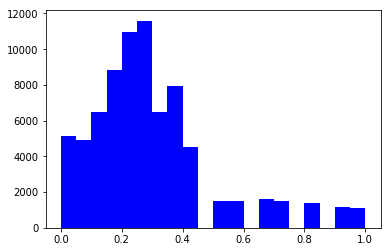

In [117]:
plt.hist(df['hand strength pf'] ** 2, bins = 20, color ='blue')

(array([ 1491.,  1425.,  1885.,  2312.,  3182.,  2978.,  3233.,  3871.,
         4932.,  4961.,  4428.,  4902.,  5332.,  6543.,  5215.,  5119.,
         2817.,  3221.,  3892.,  4872.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

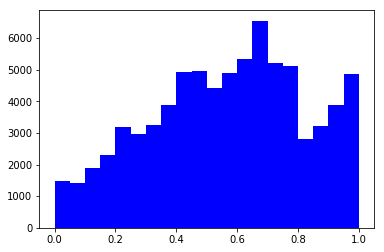

In [125]:
plt.hist(df['hand strength rv'] ** 2, bins = 20, color ='blue')

In [108]:
gamma.ppf(0,fit_alpha, loc=fit_loc, scale=fit_beta)

-0.27323146980456248

In [109]:
pfequity = pd.read_csv('./tables/totalequity.csv')#adjust pfequity from 0-1
pfequity = pfequity.drop('Unnamed: 0', axis = 1)
pfequity['1'] = pfequity['1'] - pfequity['1'].min()
pfequity['1'] = pfequity['1']/pfequity['1'].max()
pfequity = pfequity.set_index(['0'])

allpfequity = pd.read_csv('./tables/allequity.csv')
allpfequity = allpfequity.set_index('0')

In [110]:
print(pfequity)

            1
0            
AKs  0.664006
AQs  0.647740
AJs  0.631291
ATs  0.614975
A9s  0.579436
A8s  0.561447
A7s  0.541316
A6s  0.519630
A5s  0.517569
A4s  0.500936
A3s  0.486522
A2s  0.471640
AA   1.000000
AKo  0.632580
AQo  0.615332
AJo  0.597850
ATo  0.580485
A9o  0.542448
A8o  0.523135
A7o  0.501505
A6o  0.478177
A5o  0.475878
A4o  0.457753
A3o  0.441996
A2o  0.425692
KQs  0.595574
KJs  0.578841
KTs  0.562870
K9s  0.527876
K8s  0.494698
..        ...
76o  0.186998
75o  0.151461
74o  0.115317
73o  0.080414
72o  0.044366
65s  0.199466
64s  0.165939
63s  0.133698
62s  0.100518
66   0.600810
65o  0.139576
64o  0.103489
63o  0.068777
62o  0.033024
54s  0.166864
53s  0.135013
52s  0.102170
55   0.545865
54o  0.104778
53o  0.070486
52o  0.035092
43s  0.116495
42s  0.084006
44   0.485112
43o  0.050758
42o  0.015764
32s  0.069175
33   0.423752
32o  0.000000
22   0.361732

[169 rows x 1 columns]


In [75]:
import itertools
import tools
import deck as dk

In [88]:
def handprobability():
    startinghands = []
    d = dk.Deck()
    startinghands += itertools.combinations(d.deck, 2)
    startinghands = [str(h[0]) + str(h[1]) for h in startinghands]
    startinghands = pd.DataFrame(startinghands)
    startinghands['rank'] = [[h[0:2],h[2:4]] for h in startinghands[0]]
    startinghands['rank'] = [tools.startinghandsrank(h) for h in startinghands['rank']]
    startinghands = startinghands.set_index(0)
    startinghands = startinghands.sort_values('rank', ascending = False)
    startinghands['num'] = np.arange(len(startinghands['rank']))
    plt.plot(startinghands['num'], startinghands['rank'])
    return startinghands

          rank   num
0                   
AsAd  1.000000     0
AsAh  1.000000     1
AsAc  1.000000     2
AdAc  1.000000     3
AhAd  1.000000     4
AhAc  1.000000     5
KsKc  0.949462     6
KdKc  0.949462     7
KsKh  0.949462     8
KhKc  0.949462     9
KsKd  0.949462    10
KhKd  0.949462    11
QdQc  0.904836    12
QsQh  0.904836    13
QhQd  0.904836    14
QhQc  0.904836    15
QsQc  0.904836    16
QsQd  0.904836    17
JsJc  0.860323    18
JsJd  0.860323    19
JsJh  0.860323    20
JhJd  0.860323    21
JhJc  0.860323    22
JdJc  0.860323    23
TsTd  0.815565    24
TsTh  0.815565    25
TsTc  0.815565    26
ThTd  0.815565    27
TdTc  0.815565    28
ThTc  0.815565    29
...        ...   ...
2d6c  0.033024  1296
6h2c  0.033024  1297
2s6h  0.033024  1298
2s6c  0.033024  1299
6h2d  0.033024  1300
2s6d  0.033024  1301
2h4d  0.015764  1302
2h4c  0.015764  1303
2d4c  0.015764  1304
4h2d  0.015764  1305
4s2h  0.015764  1306
2s4d  0.015764  1307
4s2d  0.015764  1308
4h2c  0.015764  1309
4s2c  0.01576

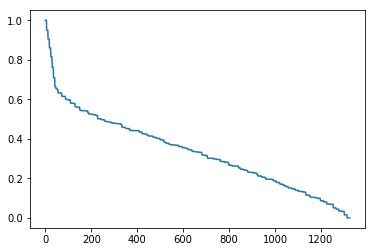

In [89]:
print(handprobability())

In [35]:
pfequity = pfequity.sort_values('1', ascending = False)

In [36]:
pfequity['rank'] = np.arange(len(pfequity['1']))

In [37]:
pfequity

,1,rank
0,,
AA,1.000000,0
KK,0.949462,1
QQ,0.904836,2
JJ,0.860323,3
TT,0.815565,4
99,0.761794,5
88,0.708856,6
AKs,0.664006,7
77,0.655132,8


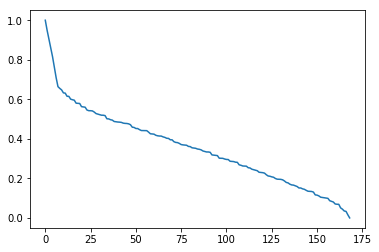

In [38]:
plt.plot(pfequity['rank'], pfequity['1'])

In [131]:
print(df.corr()['hand strength pf'].sort_values())

stack/pfpot          -0.200366
stack/flpot          -0.190875
stack/trpot          -0.180963
stack/rvpot          -0.174402
position pf/#pl pf   -0.107850
position pf          -0.085252
bluff flop           -0.064249
position fl          -0.055148
position tr          -0.051531
position rv          -0.047296
position fl/#pl fl   -0.042762
position tr/#pl tr   -0.041460
position rv/#pl rv   -0.040346
#pl tr               -0.037062
#pl rv               -0.034076
#pl fl               -0.032059
rv bets/pot           0.010332
tr bets/pot           0.013650
rv stack(bb)          0.018844
fl bets/pot           0.020206
tr stack(bb)          0.032055
cluster               0.036977
fl stack(bb)          0.040780
Unnamed: 0            0.045677
pf stack(bb)          0.053160
rv agg                0.066420
#pl pf                0.077755
tr agg                0.100878
rv bets(bb)           0.104847
bets/stacks           0.126357
tot bets/stack        0.126492
hand strength ^2      0.129926
tr bets(